In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [57]:
data = pd.read_csv('csgo_round_snapshots.csv')

In [58]:
data.shape

(122410, 97)

In [59]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [61]:
data.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [62]:
types=['object' , 'bool']
categorical_columns=list(data.select_dtypes(include=types).columns)

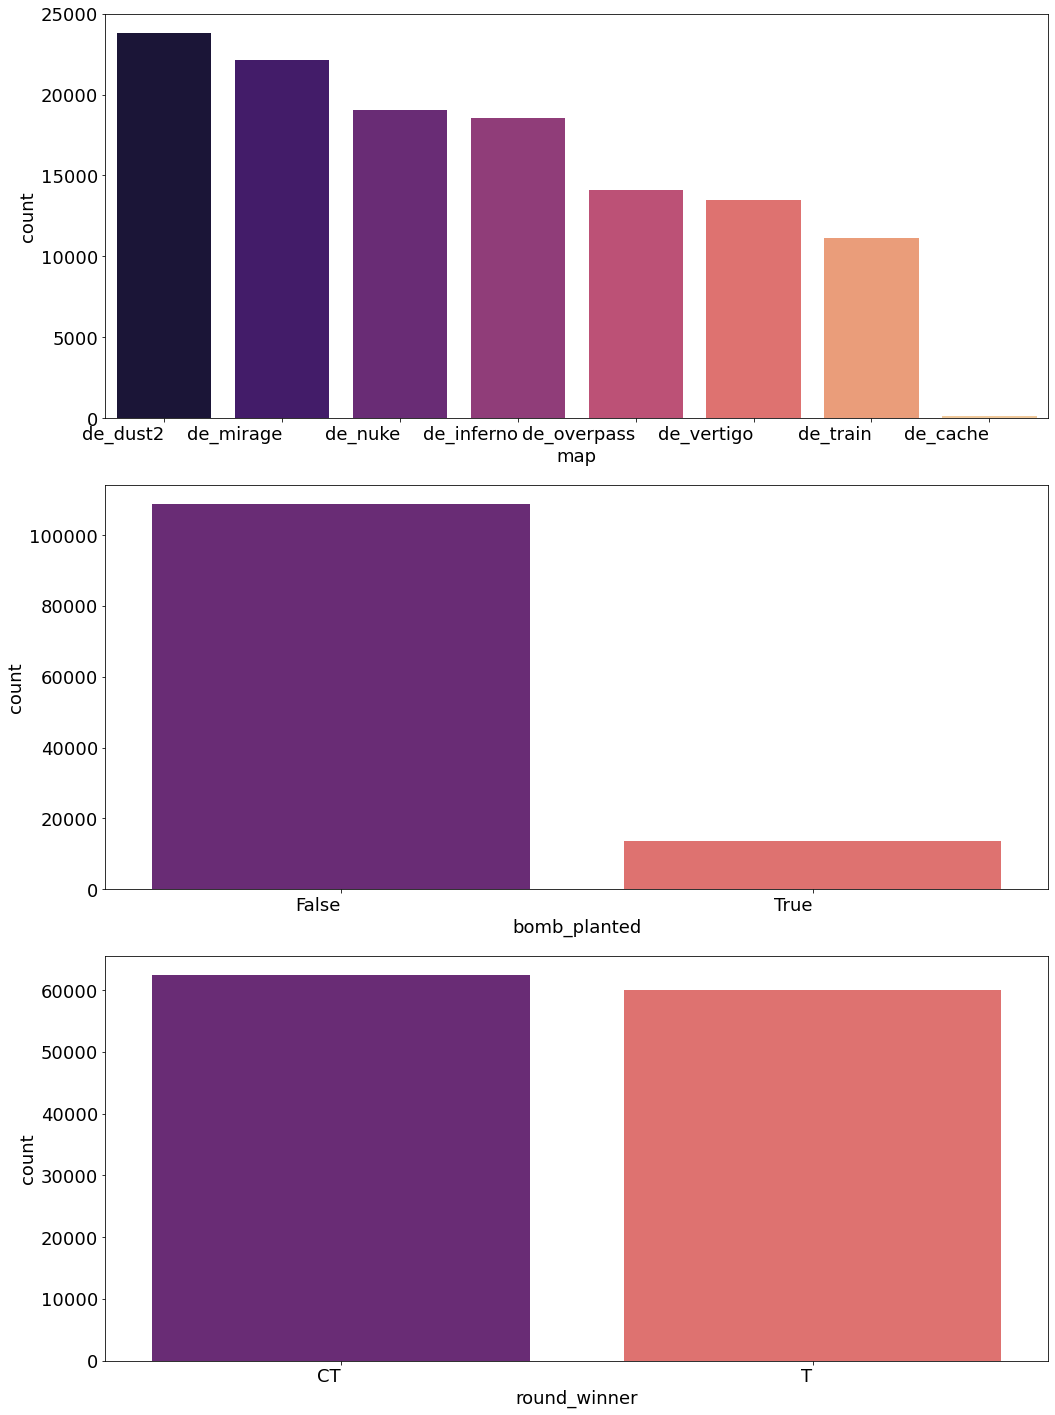

In [75]:
fig, ax = plt.subplots(3,1, figsize = (15,20))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i], palette="magma", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), ha='right')
ax = np.reshape(ax, (3, 1))
plt.tight_layout()

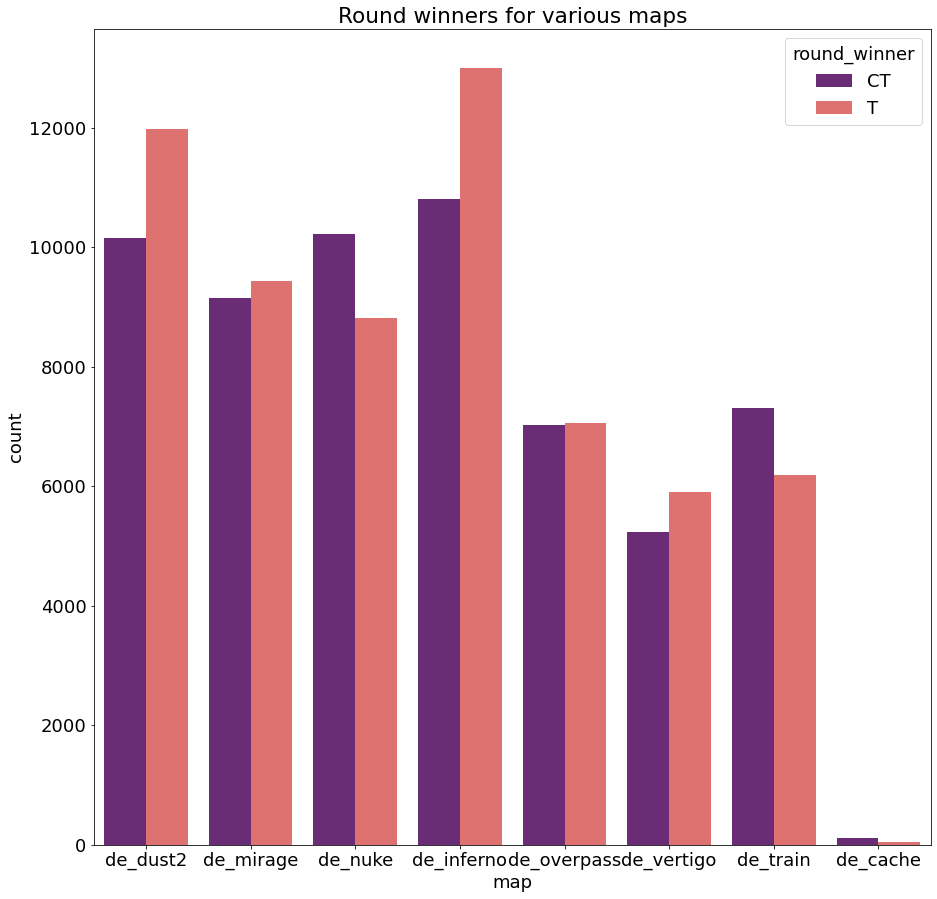

In [78]:
plt.figure(figsize=(15,15))
ax = sns.countplot(x="map", hue="round_winner", data=data, palette='magma')
ax.set(title='Round winners for various maps')
plt.show()

<Figure size 1296x432 with 0 Axes>

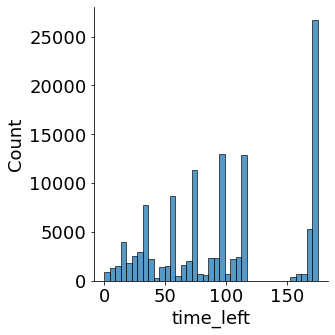

<Figure size 1296x432 with 0 Axes>

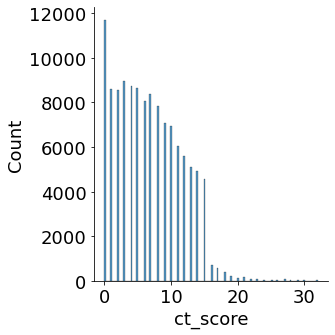

<Figure size 1296x432 with 0 Axes>

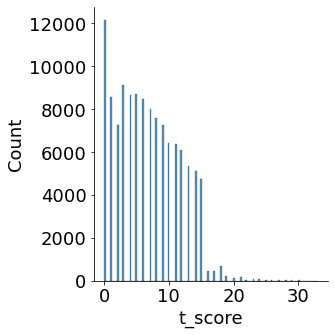

<Figure size 1296x432 with 0 Axes>

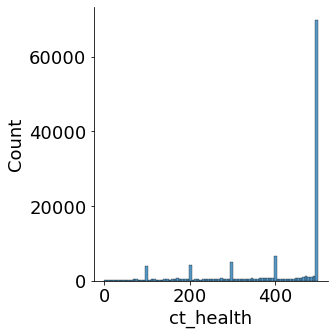

<Figure size 1296x432 with 0 Axes>

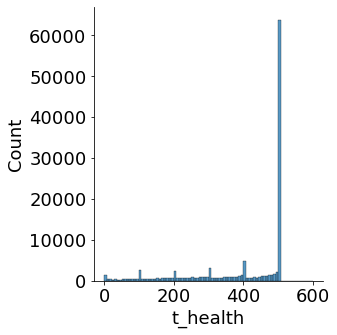

<Figure size 1296x432 with 0 Axes>

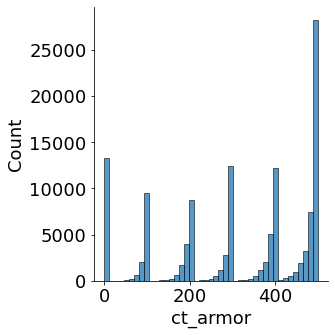

<Figure size 1296x432 with 0 Axes>

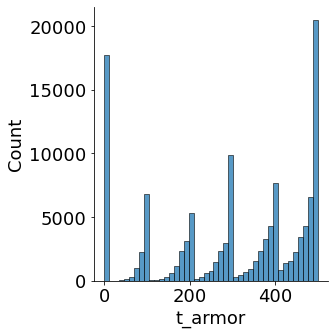

<Figure size 1296x432 with 0 Axes>

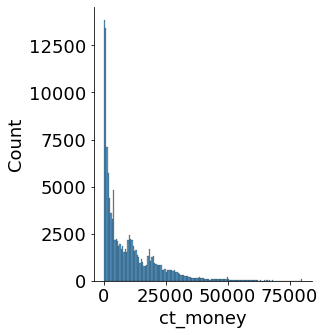

<Figure size 1296x432 with 0 Axes>

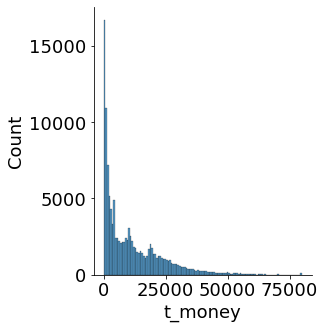

<Figure size 1296x432 with 0 Axes>

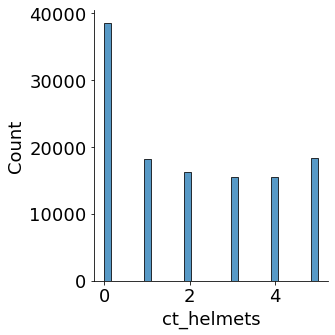

<Figure size 1296x432 with 0 Axes>

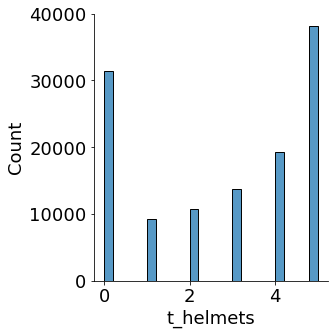

<Figure size 1296x432 with 0 Axes>

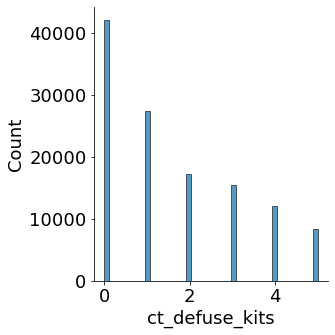

<Figure size 1296x432 with 0 Axes>

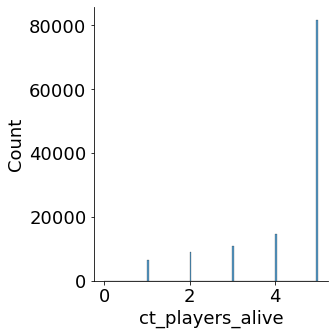

<Figure size 1296x432 with 0 Axes>

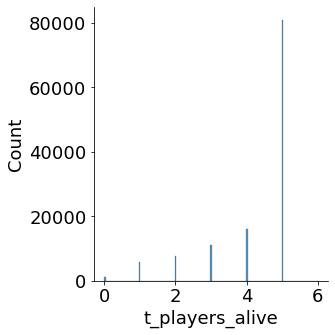

<Figure size 1296x432 with 0 Axes>

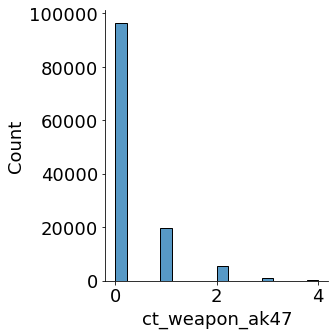

<Figure size 1296x432 with 0 Axes>

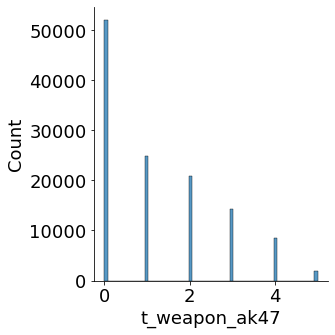

<Figure size 1296x432 with 0 Axes>

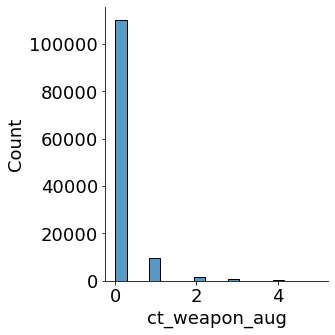

<Figure size 1296x432 with 0 Axes>

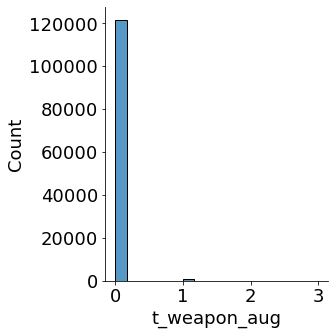

<Figure size 1296x432 with 0 Axes>

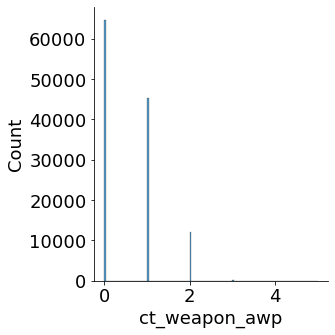

<Figure size 1296x432 with 0 Axes>

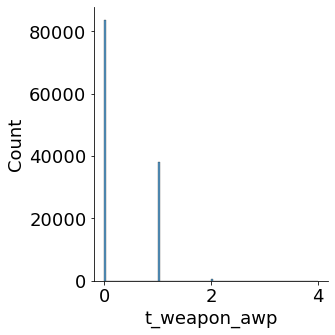

<Figure size 1296x432 with 0 Axes>

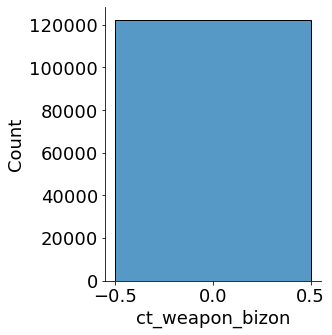

<Figure size 1296x432 with 0 Axes>

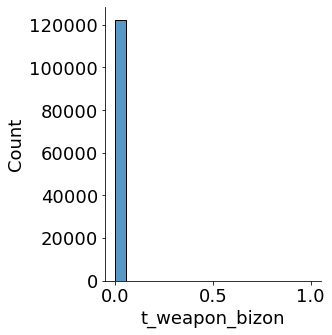

<Figure size 1296x432 with 0 Axes>

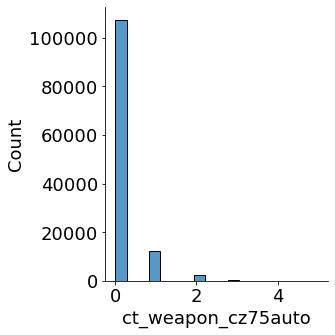

<Figure size 1296x432 with 0 Axes>

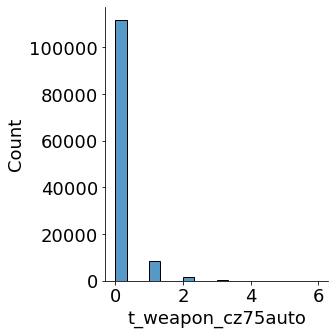

<Figure size 1296x432 with 0 Axes>

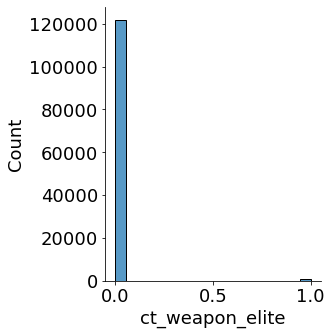

<Figure size 1296x432 with 0 Axes>

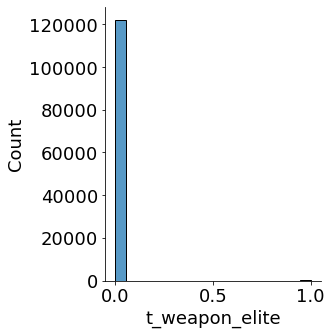

<Figure size 1296x432 with 0 Axes>

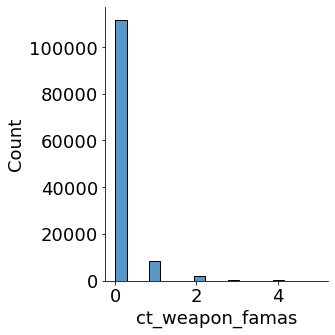

<Figure size 1296x432 with 0 Axes>

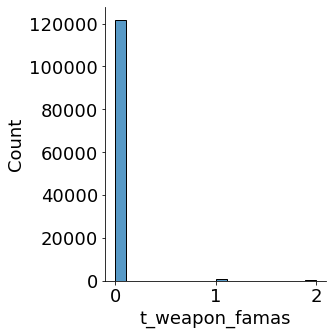

<Figure size 1296x432 with 0 Axes>

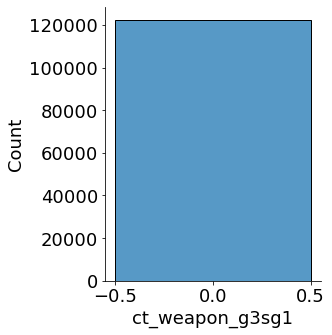

<Figure size 1296x432 with 0 Axes>

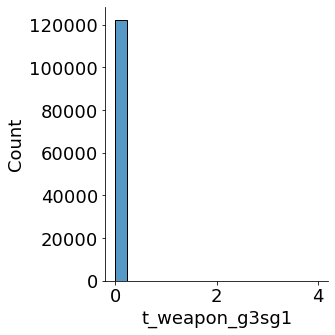

<Figure size 1296x432 with 0 Axes>

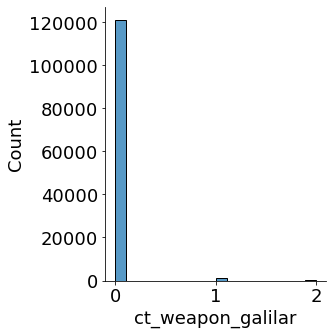

<Figure size 1296x432 with 0 Axes>

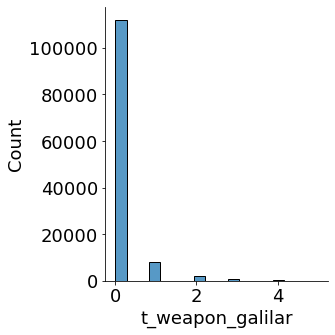

<Figure size 1296x432 with 0 Axes>

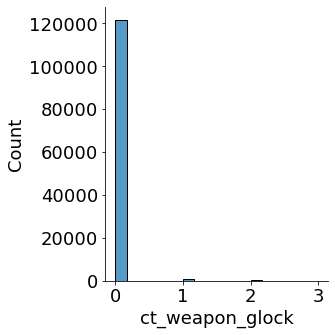

<Figure size 1296x432 with 0 Axes>

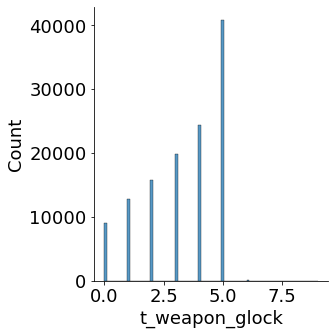

<Figure size 1296x432 with 0 Axes>

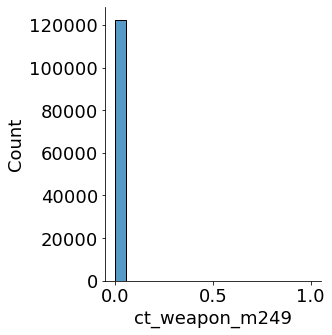

<Figure size 1296x432 with 0 Axes>

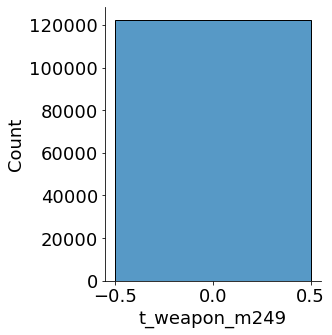

<Figure size 1296x432 with 0 Axes>

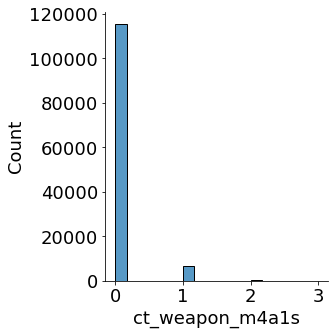

<Figure size 1296x432 with 0 Axes>

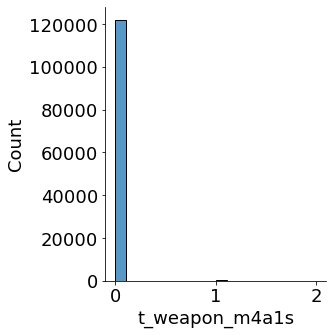

<Figure size 1296x432 with 0 Axes>

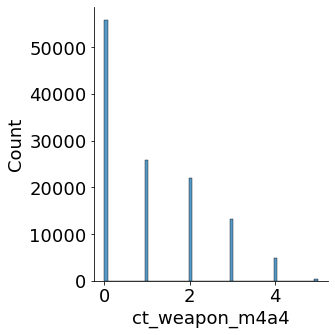

<Figure size 1296x432 with 0 Axes>

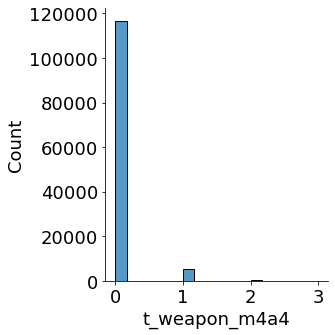

<Figure size 1296x432 with 0 Axes>

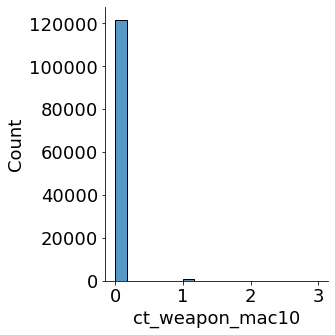

<Figure size 1296x432 with 0 Axes>

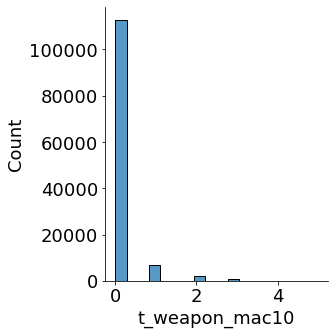

<Figure size 1296x432 with 0 Axes>

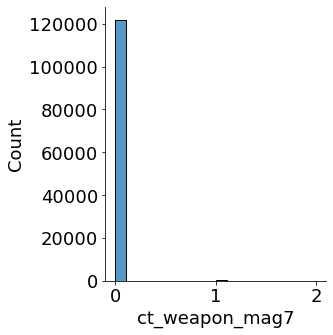

<Figure size 1296x432 with 0 Axes>

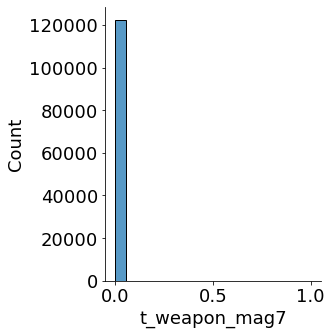

<Figure size 1296x432 with 0 Axes>

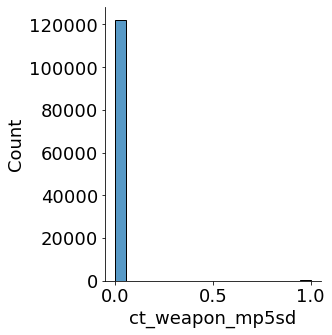

<Figure size 1296x432 with 0 Axes>

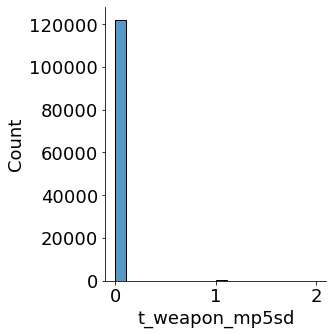

<Figure size 1296x432 with 0 Axes>

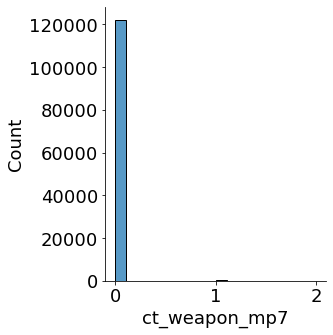

<Figure size 1296x432 with 0 Axes>

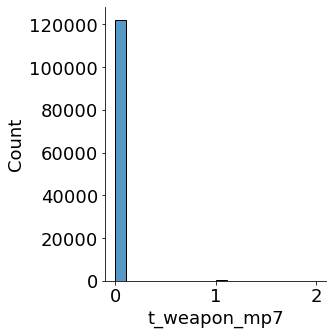

<Figure size 1296x432 with 0 Axes>

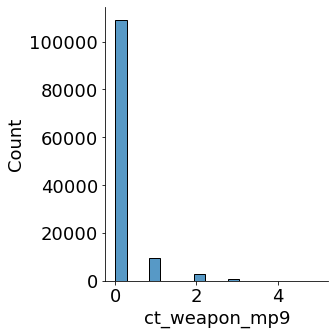

<Figure size 1296x432 with 0 Axes>

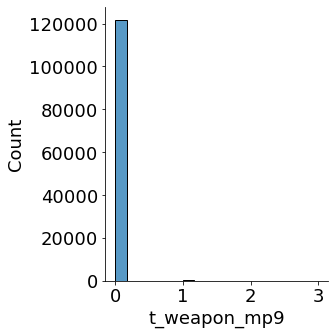

<Figure size 1296x432 with 0 Axes>

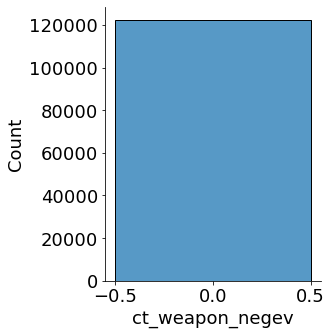

<Figure size 1296x432 with 0 Axes>

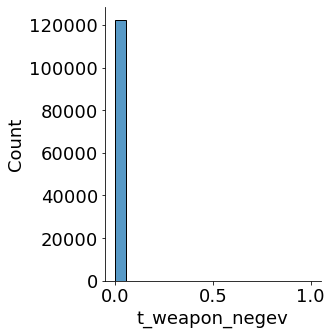

<Figure size 1296x432 with 0 Axes>

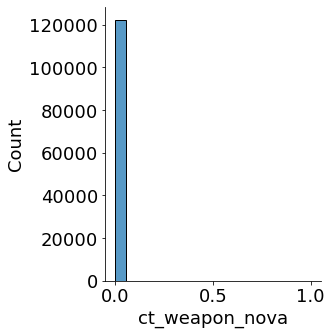

<Figure size 1296x432 with 0 Axes>

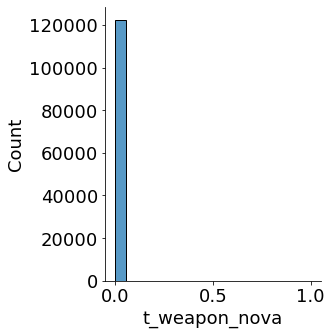

<Figure size 1296x432 with 0 Axes>

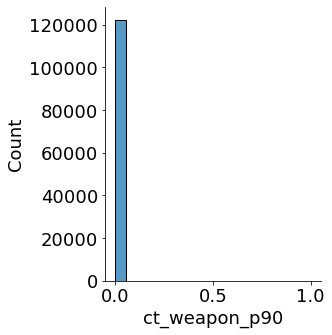

<Figure size 1296x432 with 0 Axes>

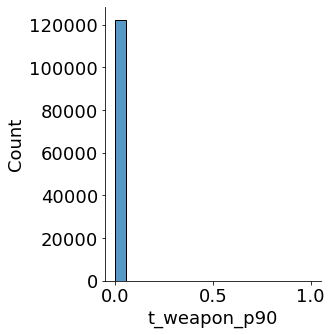

<Figure size 1296x432 with 0 Axes>

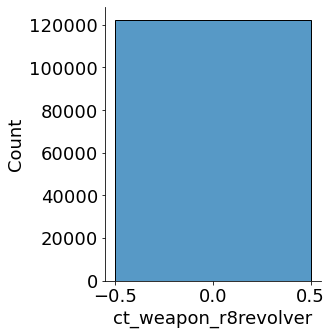

<Figure size 1296x432 with 0 Axes>

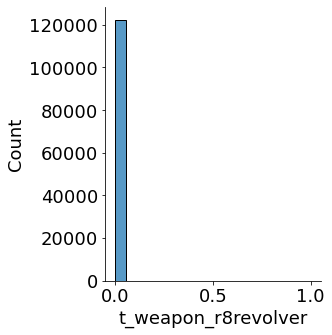

<Figure size 1296x432 with 0 Axes>

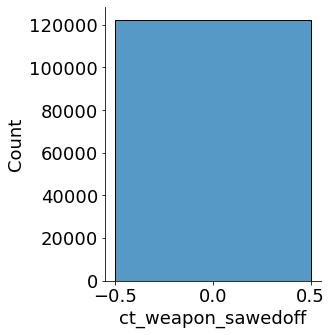

<Figure size 1296x432 with 0 Axes>

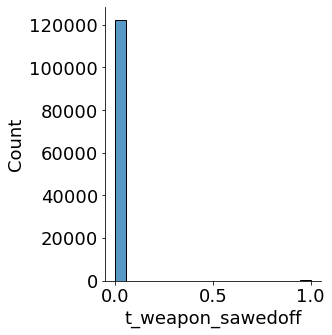

<Figure size 1296x432 with 0 Axes>

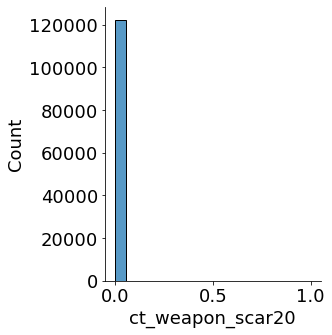

<Figure size 1296x432 with 0 Axes>

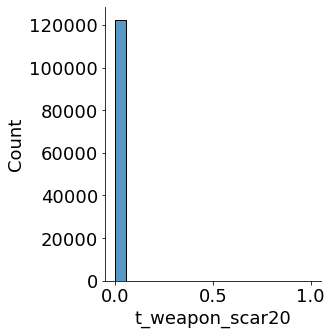

<Figure size 1296x432 with 0 Axes>

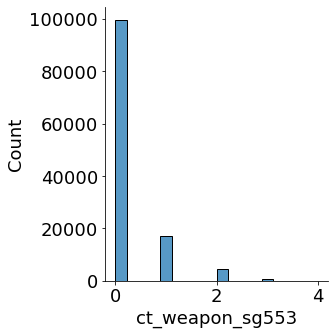

<Figure size 1296x432 with 0 Axes>

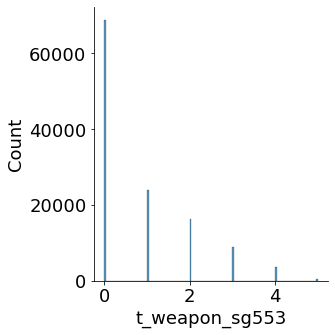

<Figure size 1296x432 with 0 Axes>

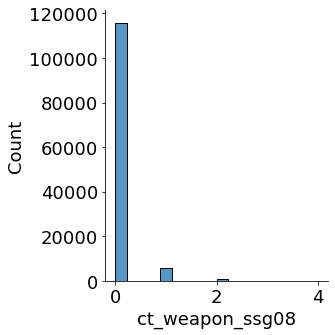

<Figure size 1296x432 with 0 Axes>

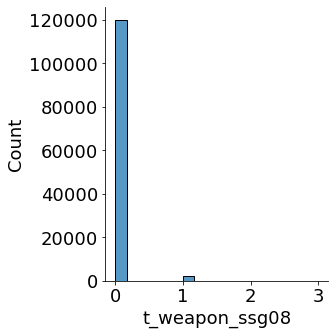

<Figure size 1296x432 with 0 Axes>

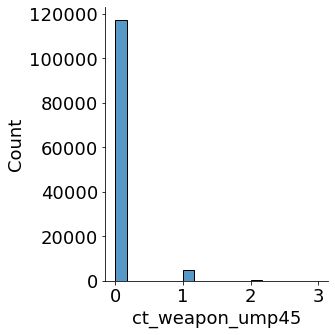

<Figure size 1296x432 with 0 Axes>

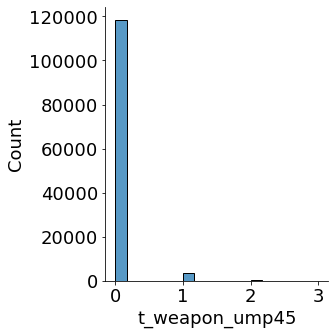

<Figure size 1296x432 with 0 Axes>

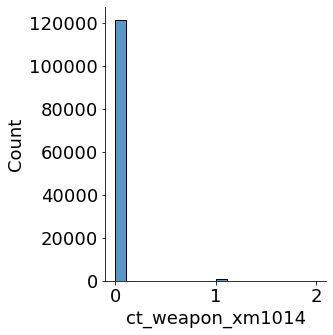

<Figure size 1296x432 with 0 Axes>

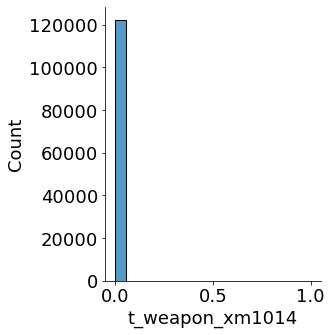

<Figure size 1296x432 with 0 Axes>

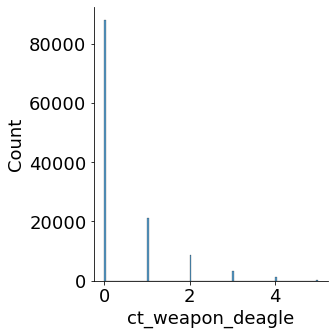

<Figure size 1296x432 with 0 Axes>

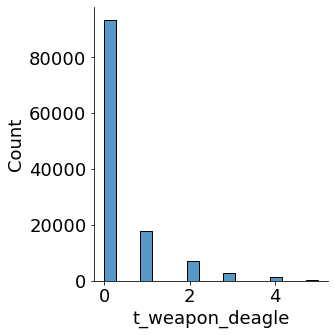

<Figure size 1296x432 with 0 Axes>

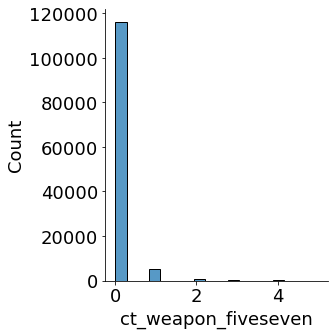

<Figure size 1296x432 with 0 Axes>

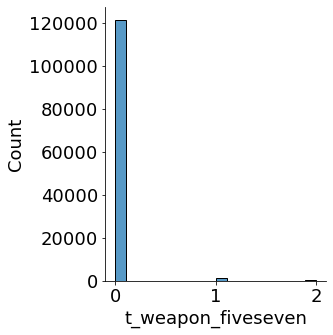

<Figure size 1296x432 with 0 Axes>

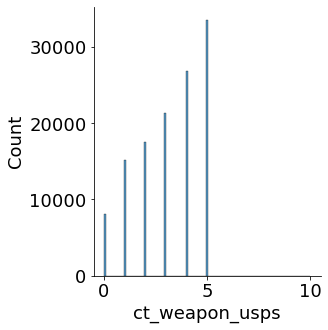

<Figure size 1296x432 with 0 Axes>

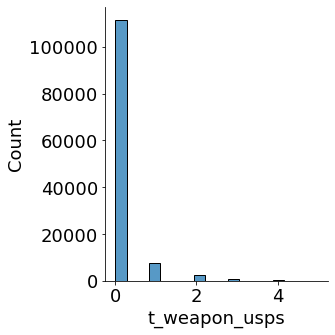

<Figure size 1296x432 with 0 Axes>

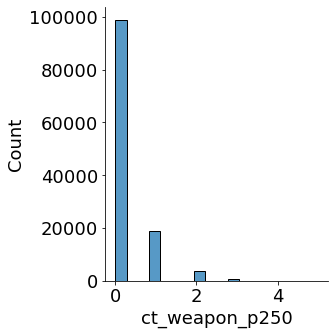

<Figure size 1296x432 with 0 Axes>

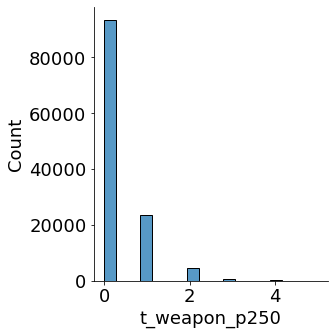

<Figure size 1296x432 with 0 Axes>

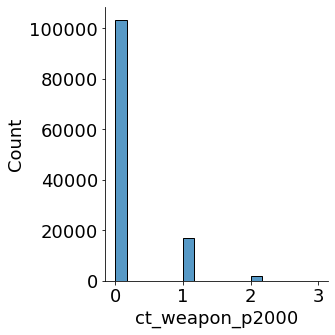

<Figure size 1296x432 with 0 Axes>

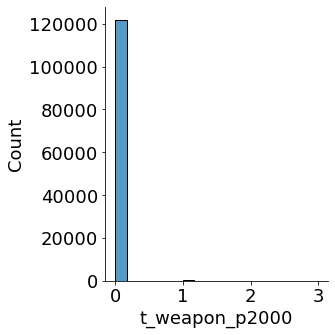

<Figure size 1296x432 with 0 Axes>

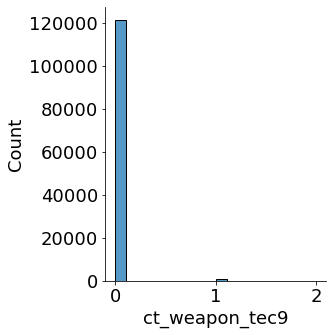

<Figure size 1296x432 with 0 Axes>

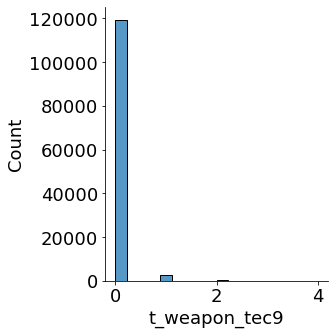

<Figure size 1296x432 with 0 Axes>

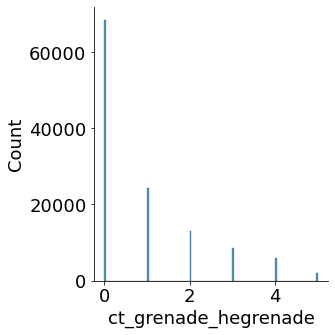

<Figure size 1296x432 with 0 Axes>

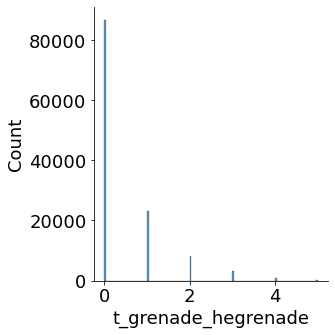

<Figure size 1296x432 with 0 Axes>

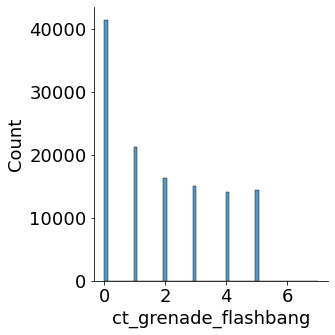

<Figure size 1296x432 with 0 Axes>

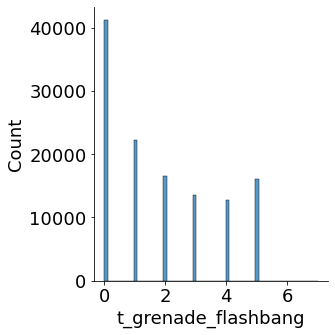

<Figure size 1296x432 with 0 Axes>

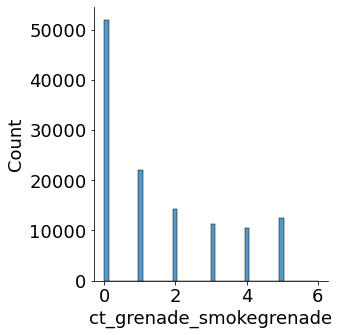

<Figure size 1296x432 with 0 Axes>

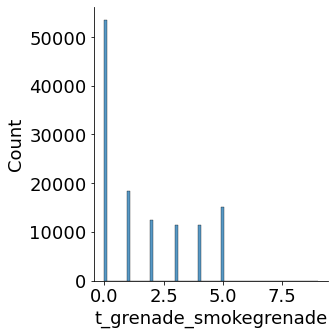

<Figure size 1296x432 with 0 Axes>

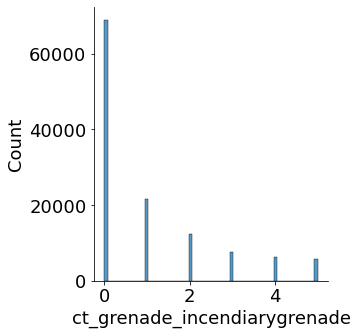

<Figure size 1296x432 with 0 Axes>

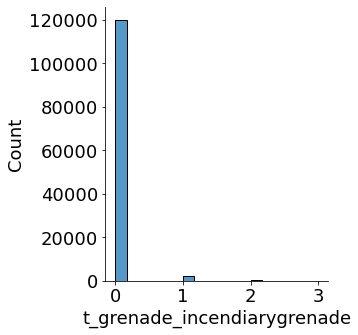

<Figure size 1296x432 with 0 Axes>

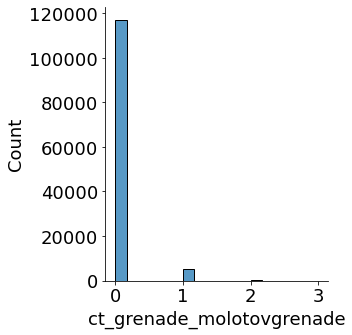

<Figure size 1296x432 with 0 Axes>

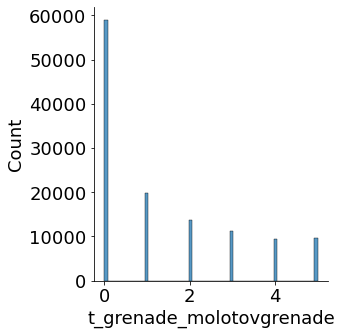

<Figure size 1296x432 with 0 Axes>

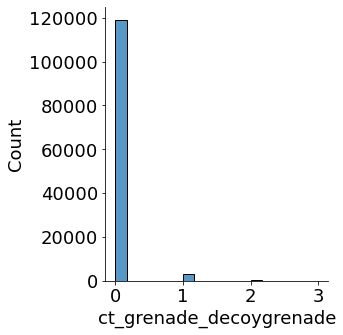

<Figure size 1296x432 with 0 Axes>

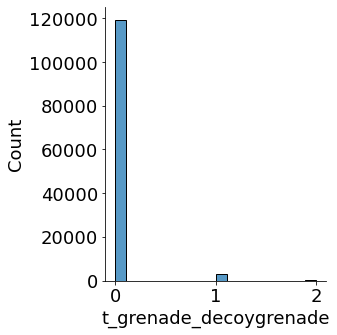

In [79]:
numCols = data.select_dtypes([np.number]).columns

for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, palette="magma")
    plt.show()

In [66]:
weapons = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
           'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
           'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
           't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
           'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
           't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
           'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
           'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
           'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
           'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
           'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
           'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
           't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
           'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
           't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
           'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
           't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
           'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
           't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
           't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
           'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
           't_grenade_flashbang', 'ct_grenade_smokegrenade',
           't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
           't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
           't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
           't_grenade_decoygrenade']

nums = [0]*len(weapons)

In [67]:
for i in range(0, len(weapons)):
    nums[weapons.index(weapons[i])] = sum(data[weapons[i]])
   
for i in range(0, len(weapons)):
    weapons[i] = [weapons[i], outs[i]]

weapons.sort(key=lambda xx: xx[1], reverse=False)
nameOfWeapon = []
numberOfWeapon = []

for i in range(0, len(weapons)):
    nameOfWeapon.append(weapons[i][0])
    numberOfWeapon.append(weapons[i][1])


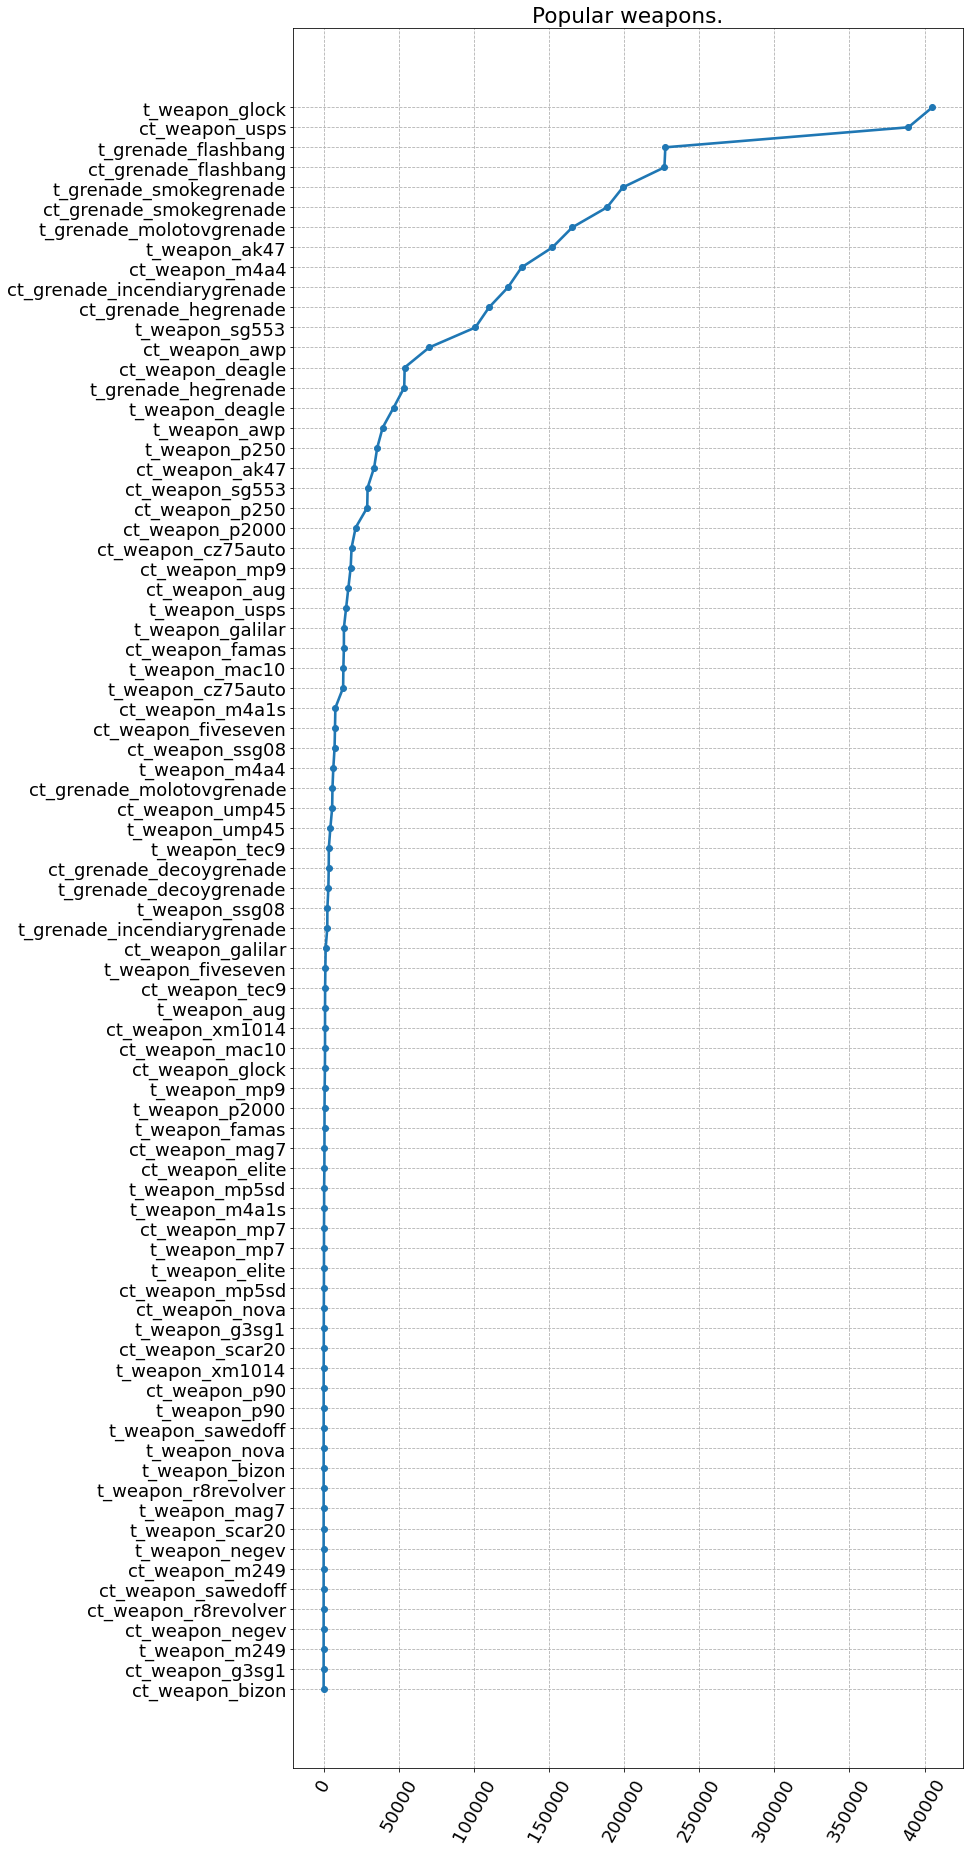

In [68]:
plt.title("Popular weapons.")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
plt.plot(y, x, linewidth=2.61, marker="o")
plt.show()    

In [17]:
round_winner=data['round_winner']

In [29]:
round_winner.describe()

count     122410
unique         2
top            T
freq       62406
Name: round_winner, dtype: object

In [30]:
round_winner.value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

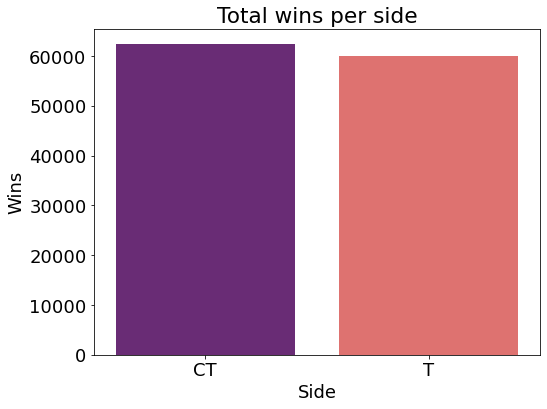

In [83]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=data['round_winner'].unique(), y=data['round_winner'].value_counts() , palette='magma')
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

<AxesSubplot:ylabel='round_winner'>

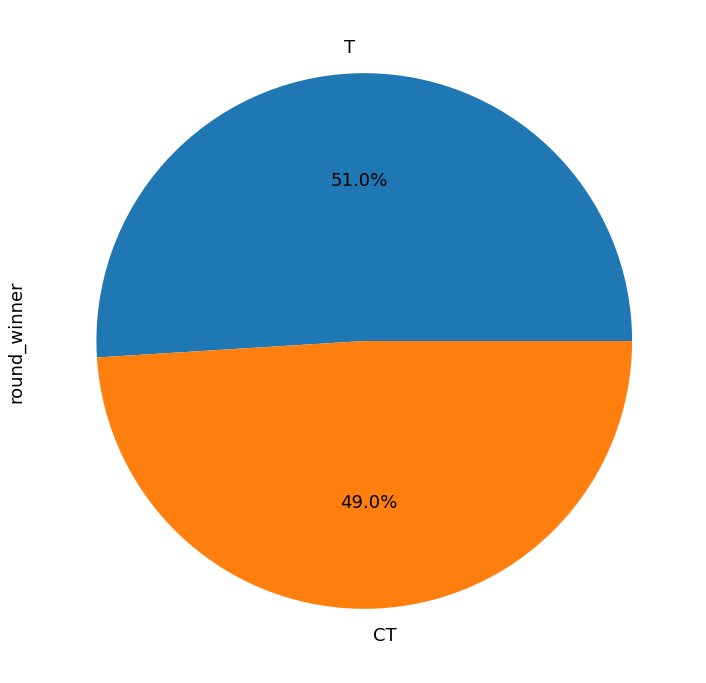

In [82]:
round(round_winner.value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [16]:
#checking duplicated row
data.duplicated().sum()

4962

In [34]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [35]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings={index : label for index, label in enumerate(encoder.classes_)}
print(map_mappings)

{0: 'de_cache', 1: 'de_dust2', 2: 'de_inferno', 3: 'de_mirage', 4: 'de_nuke', 5: 'de_overpass', 6: 'de_train', 7: 'de_vertigo'}


In [36]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])
roundwinner_mappings={index : label for index, label in enumerate(encoder.classes_)}
print(roundwinner_mappings)

{0: 'CT', 1: 'T'}


In [37]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [38]:
y=data['round_winner']
X=data.drop('round_winner', axis=1)


In [39]:
columns=X.columns

In [40]:
t=[]
for i in columns:
    t.append(X[i].nunique())

In [41]:
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


C:\Users\Murat GENCER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ct_weapon_sawedoff', ylabel='count'>

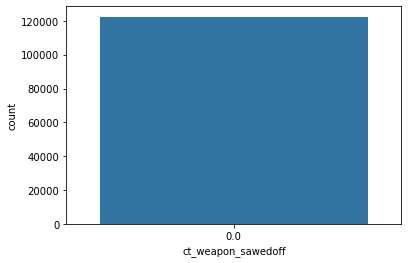

In [42]:
sns.countplot(X[columns[60]])


In [43]:
X.drop([columns[22], columns[30], columns[37], columns[52], columns[58], columns[60]], axis = 1, inplace = True)
print(columns[22])
print(columns[30])
print(columns[37])
print(columns[52])
print(columns[58])
print(columns[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [44]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [45]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,...,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,...,0.000000,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
122407,0.178754,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,1.000000,1.000000,0.666667,1.333333,0.5,0.0,0.0,2.0,0.0,0.0
122408,0.000179,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,0.000000,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.5,0.0,0.0


In [46]:
corr = pd.DataFrame(X).corr()
print(corr.shape)

(90, 90)


<AxesSubplot:>

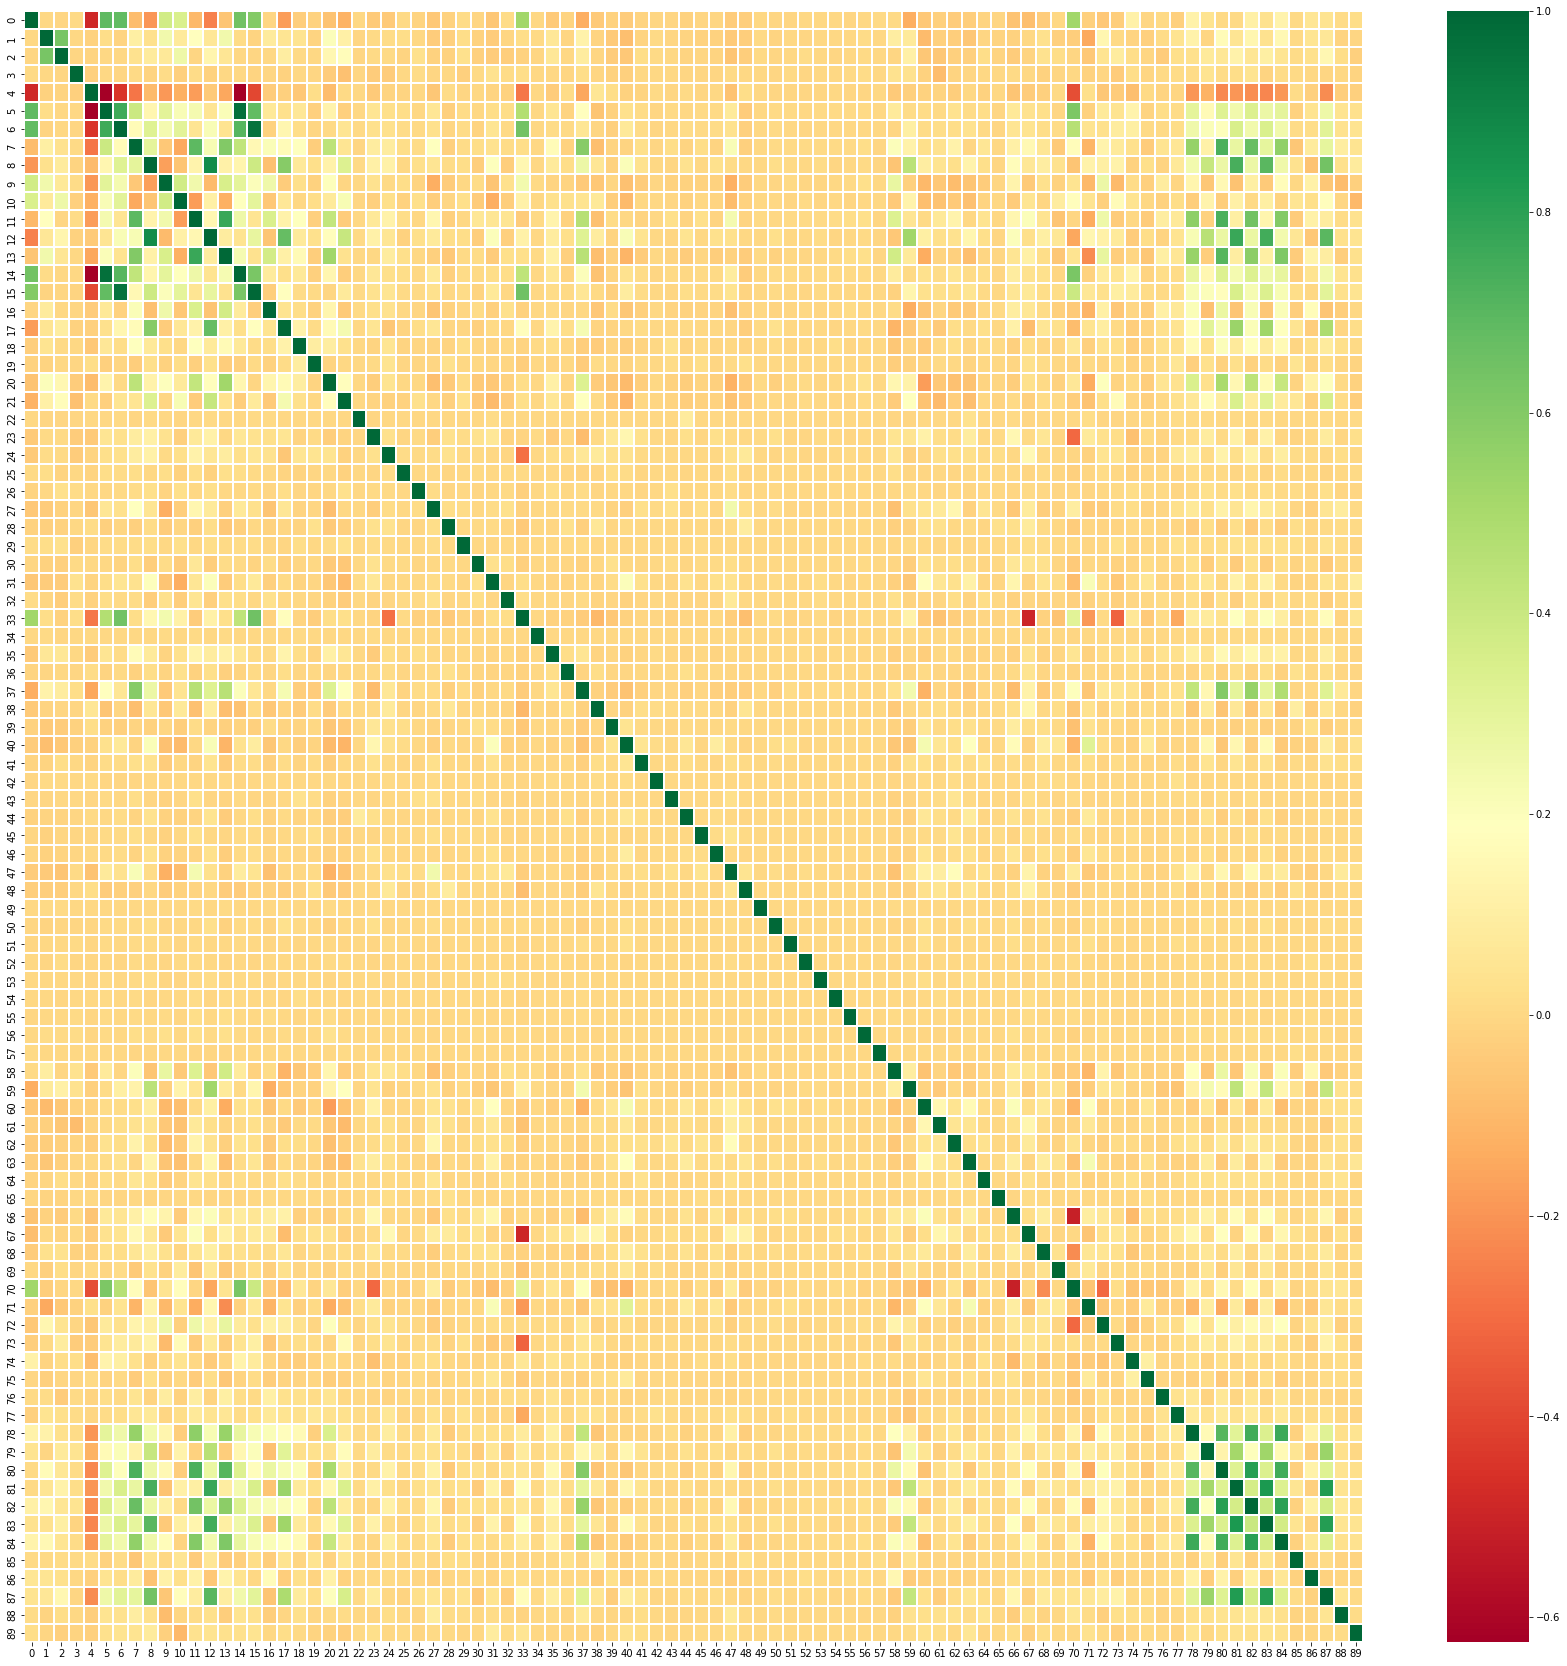

In [47]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)

In [48]:
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['t_helmets', 'ct_players_alive', 't_players_alive', 'ct_grenade_smokegrenade', 't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade', 't_grenade_molotovgrenade']


C:\Users\Murat GENCER\AppData\Local\Temp\ipykernel_10896\1200767784.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
